In [1]:
import opendatasets as od

In [2]:
od.download('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')

Using downloaded and verified file: .\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('.\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=True,index_col='Date')
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})

In [8]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Bitcoin Price from 2013 to 2021')

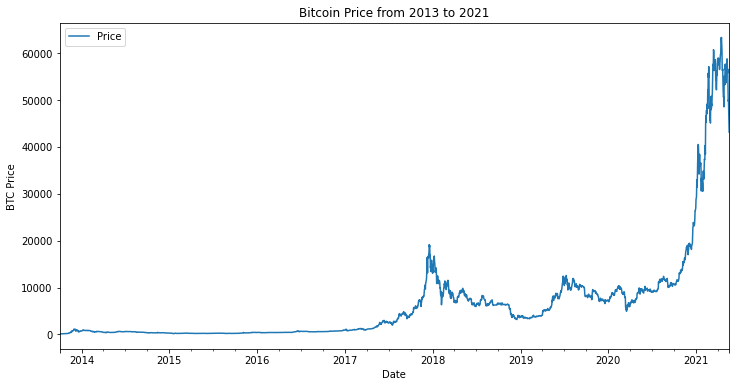

In [10]:
bitcoin_prices.plot(figsize=(12,6))
plt.ylabel('BTC Price')
plt.title('Bitcoin Price from 2013 to 2021')

## Create Train and  Test

The wrong way

In [11]:
# Get bitcoin date array 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

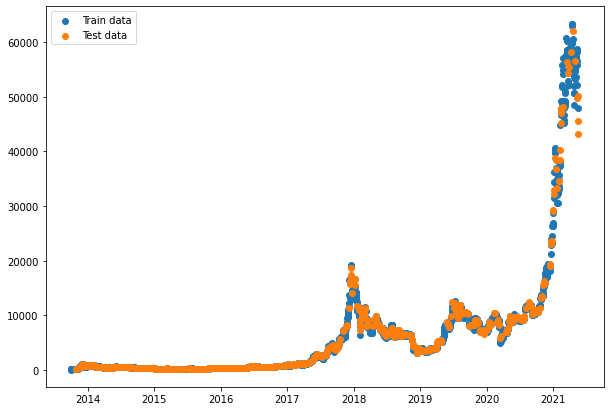

In [14]:
# Let's visualize the wrong data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.legend(['Train data','Test data'])
plt.show()

This kind of random split is okay for datasets without a time component (such as images or passages of text for classification problems) but for time series, we've got to take the time factor into account.

To fix this, we've got to split our data in a way that reflects what we're actually trying to do.

We need to split our historical Bitcoin data to have a dataset that reflects the past (train set) and a dataset that reflects the future (test set).

The right way

In [15]:
# Create train and test splits the right way for time series data
size=int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train,y_train=timesteps[:size],prices[:size]
X_test,y_test=timesteps[size:],prices[size:]

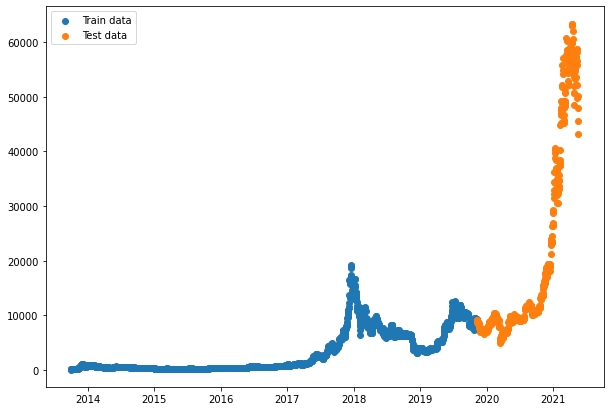

In [16]:
# Let's visualize the right data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.legend(['Train data','Test data'])
plt.show()

## Create a plotting function

In [17]:
# Create a function to plot time series data
def plot_time_series(X, y, format='.', start=0, end=None,label=None):
    
    plt.plot(X[start:end], y[start:end], format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)


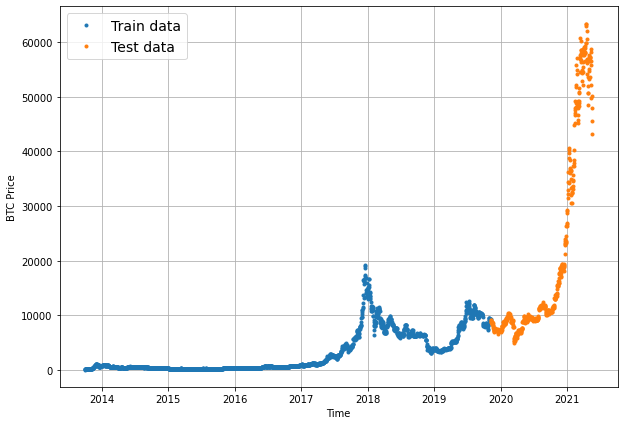

In [18]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(X=X_train, y=y_train,label='Train data')
plot_time_series(X=X_test, y=y_test,label='Test data')


## Model 0: Naïve forecast (baseline)

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

yft=y(t-1)

In [19]:
naive_forecast=y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

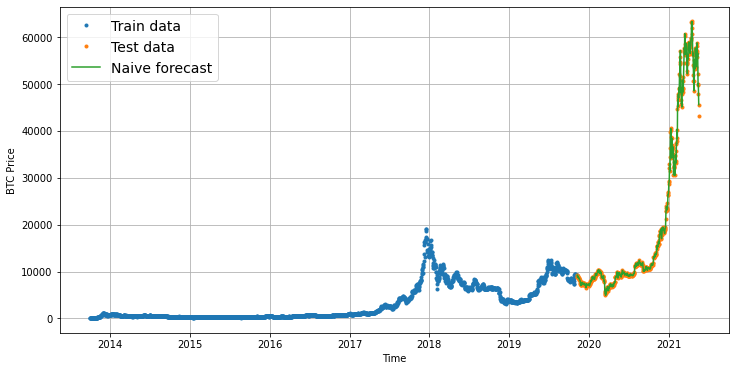

In [20]:
# Plot naive forecast
plt.figure(figsize=(12,6))
plot_time_series(X=X_train,y=y_train,label='Train data')
plot_time_series(X=X_test,y=y_test,label='Test data')
plot_time_series(X=X_test[1:],y=naive_forecast,format='-',label='Naive forecast')

The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the start parameter of our plot_time_series() function.

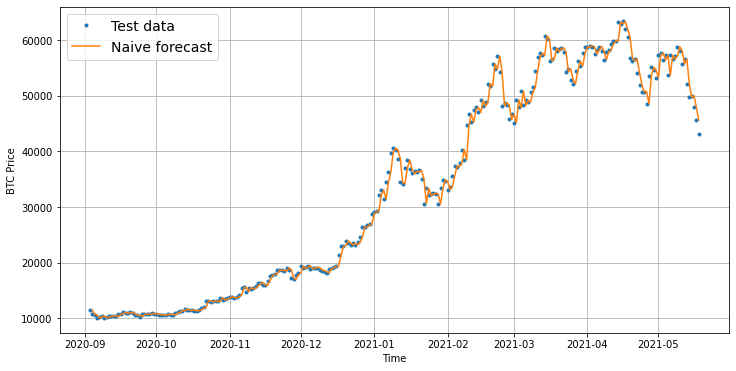

In [21]:
plt.figure(figsize=(12,6))
offset=300
plot_time_series(X=X_test,y=y_test,start=offset,label='Test data')
plot_time_series(X=X_test[1:],y=naive_forecast,format='-',start=offset,label='Naive forecast')

## Evaluating a time series model

Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

And what kind of problem is predicting a number?

Ten points if you said regression.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: how do our model's predictions (y_pred) compare against the actual values (y_true or ground truth values)?

For all of the following metrics, lower is better (for example an MAE of 0 is better than an MAE 100).

In [22]:
# Let's get TensorFlow! 
import tensorflow as tf
from tensorflow.keras import layers

We are going to calculate 5 evaluation metrics
* mae
* mse
* rmse
* mape
* mase

Tensorflow doesn't have ready made MASE but we can calculate usin MEAN_ABSOLUTE_ERROR

In [23]:
def mean_absolute_squared_error(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))

    # mae for naive forecast
    mae_forecast=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

    return mae/mae_forecast

In [24]:
def make_results(y_true,y_pred):
    
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=mean_absolute_squared_error(y_true,y_pred)
    
    return {'mae':mae.numpy(),
            'mse':mse.numpy(),
            'rmse':rmse.numpy(),
            'mape':mape.numpy(),
            'mase':mase.numpy()}

In [25]:
naive_results=make_results(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 567.9802273457542,
 'mse': 1147547.125023896,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182626}

In [26]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

Okay, looking at these two values is starting to give us an idea of how our model is performing:

* The average price of Bitcoin in the test dataset is: $20,056 (note: average may not be the best measure here, since the highest price is over 3x this value and the lowest price is over 4x lower)

* Each prediction in naive forecast is on average off by: $567

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

## Format Data Part 2: Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

In [27]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [28]:
def predict_one_day(x,horizon=1):
    return x[:,:-horizon],x[:,-horizon:]

In [29]:
test_window,window_label=predict_one_day(x=(tf.expand_dims(tf.range(9)+1,axis=0)),horizon=1)

In [30]:
print('Test window : {}'.format(tf.squeeze(test_window).numpy()),'->Label : {}'.format(tf.squeeze(window_label).numpy()))


Test window : [1 2 3 4 5 6 7 8] ->Label : 9


In [31]:
len(prices)

2787

In [32]:
import numpy as np

In [33]:
# Create function to view NumPy arrays as windows 
def make_windows(x,window_size=7,horizon=1):
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    # 4. Get the labelled windows
    windows, labels = predict_one_day(windowed_array, horizon=horizon)
    return windows,labels


In [34]:
window_step=np.expand_dims(np.arange(7+1),axis=0)
window_indexes=window_step + np.expand_dims(np.arange(len(prices)-(7+1-1)),axis=0).T
window_indexes.shape

(2780, 8)

In [35]:
windowed_array = prices[window_indexes]
windowed_array.shape

(2780, 8)

In [36]:
windows, labels = predict_one_day(windowed_array, horizon=1)

In [37]:
windows,labels

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [38]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [39]:
full_windows.shape,full_labels.shape

((2780, 7), (2780, 1))

In [40]:
full_windows[0],full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]),
 array([123.033]))

## Turning windows into training and test sets

In [41]:
def make_train_test_split(windows,labels):
    split_size=int(0.8*len(windows))
    window_trains=windows[:split_size]
    window_tests=windows[split_size:]
    label_trains=labels[:split_size]
    label_tests=labels[split_size:]

    return window_trains,window_tests,label_trains,label_tests    

In [42]:
window_trains,window_tests,label_trains,label_tests= make_train_test_split(full_windows,full_labels)

In [43]:
window_trains.shape,window_tests.shape,label_trains.shape,label_tests.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [44]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [45]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_1.fit(x=window_trains, # train windows of 7 timesteps of Bitcoin prices
            y=label_trains, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(window_tests, label_tests),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 113ms/step - loss: 780.3469 - mae: 780.3469 - val_loss: 2279.5830 - val_mae: 2279.5830
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 247.6765 - mae: 247.6765 - val_loss: 1005.9865 - val_mae: 1005.9865
Epoch 3/100
18/18 [==============================] - 1s 47ms/step - loss: 188.4107 - mae: 188.4107 - val_loss: 923.2859 - val_mae: 923.2859
Epoch 4/100
18/18 [==============================] - 1s 39ms/step - loss: 169.4334 - mae: 169.4334 - val_loss: 900.5931 - val_mae: 900.5931
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 165.0900 - mae: 165.0900 - val_loss: 895.2404 - val_mae: 895.2404
Epoch 6/100
18/18 [==============================] - 1s 49ms/step - loss: 158.5206 - mae: 158.5206 - val_loss: 855.1868 - val_mae: 855.1868
Epoch 7/100
18/18 [==============================] - 1s 47ms/step - loss: 151.3568 - mae: 151.3568 - val_loss: 840.9290 - val_mae: 840.9290
Epoch 8/100
18/

18/18 [==============================] - 1s 41ms/step - loss: 110.7447 - mae: 110.7447 - val_loss: 592.7401 - val_mae: 592.7401
Epoch 36/100
18/18 [==============================] - 1s 44ms/step - loss: 116.3300 - mae: 116.3300 - val_loss: 592.4697 - val_mae: 592.4697
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7676 - mae: 110.7676 - val_loss: 618.5349 - val_mae: 618.5349
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5935 - mae: 112.5935 - val_loss: 613.9559 - val_mae: 613.9559
Epoch 39/100
18/18 [==============================] - 1s 49ms/step - loss: 110.1321 - mae: 110.1321 - val_loss: 586.6888 - val_mae: 586.6888
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4753 - mae: 109.4753 - val_loss: 593.9155 - val_mae: 593.9155
Epoch 41/100
18/18 [==============================] - 1s 40ms/step - loss: 110.1777 - mae: 110.1777 - val_loss: 586.4464 - val_mae: 586.4464
Epoch 42/100
18/18 [=========

18/18 [==============================] - 0s 4ms/step - loss: 116.6343 - mae: 116.6343 - val_loss: 575.4343 - val_mae: 575.4343
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8731 - mae: 110.8731 - val_loss: 654.5371 - val_mae: 654.5371
Epoch 84/100
18/18 [==============================] - 1s 40ms/step - loss: 111.9106 - mae: 111.9106 - val_loss: 572.3371 - val_mae: 572.3371
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6154 - mae: 106.6154 - val_loss: 574.2831 - val_mae: 574.2831
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 108.4299 - mae: 108.4299 - val_loss: 583.3528 - val_mae: 583.3528
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7481 - mae: 105.7481 - val_loss: 593.0125 - val_mae: 593.0125
Epoch 88/100
18/18 [==============================] - 1s 42ms/step - loss: 107.2604 - mae: 107.2604 - val_loss: 571.7660 - val_mae: 571.7660
Epoch 89/100
18/18 [===========

In [46]:
# Evaluate model
model_1.evaluate(window_tests,label_tests)

18/18 [==============================] - 0s 2ms/step - loss: 662.5316 - mae: 662.5316


[662.5316162109375, 662.5316162109375]

In [47]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(window_tests, label_tests)

18/18 [==============================] - 0s 2ms/step - loss: 568.5498 - mae: 568.5498


[568.5498046875, 568.5498046875]

In [48]:
def make_preds(model, input_data):
    
    

  
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [49]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, window_tests)
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.987, 8804.829, 8741.212, 8749.836,
        8705.867, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [50]:
(model_1_preds.numpy()).shape,label_tests.shape

((556,), (556, 1))

In [51]:
# Evaluate preds
model_1_results = make_results(y_true=tf.squeeze(label_tests), # reduce to right shape
                                 y_pred=model_1_preds.numpy())
model_1_results

{'mae': 568.5499,
 'mse': 1172587.9,
 'rmse': 1082.861,
 'mape': 2.5492291,
 'mase': 0.9987845467588513}

## Model 2: Dense (window = 30, horizon = 1)

In [52]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 30 # use a month worth of timesteps to predict the horizon

In [53]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [54]:
window_trains, window_tests, label_trains, label_tests = make_train_test_split(full_windows, full_labels)
len(window_trains), len(window_tests), len(label_trains), len(label_tests)

(2205, 552, 2205, 552)

In [55]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(window_trains,
            label_trains,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(window_tests, label_tests),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [56]:
model_2.evaluate(window_tests,label_tests)

18/18 [==============================] - 0s 966us/step - loss: 658.0291


658.029052734375

In [57]:
model_2_preds=make_preds(model_2,window_tests)
model_2_preds

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 9021.133 ,  9045.923 ,  8904.477 ,  8701.531 ,  8566.087 ,
        8457.516 ,  8387.046 ,  8254.143 ,  8298.98  ,  7915.7983,
        7429.2314,  7307.091 ,  7177.6   ,  7180.1357,  7216.906 ,
        7419.5176,  7598.017 ,  7687.268 ,  7701.6636,  7521.379 ,
        7477.1934,  7334.278 ,  7379.4717,  7440.684 ,  7604.205 ,
        7610.9272,  7625.792 ,  7506.667 ,  7261.4507,  7336.883 ,
        7219.828 ,  7398.832 ,  7219.4443,  7293.3936,  7054.9004,
        6829.977 ,  7173.7183,  7345.5884,  7193.3447,  7392.4795,
        7334.325 ,  7356.031 ,  7360.882 ,  7302.5854,  7285.7544,
        7335.1455,  7322.0264,  7499.149 ,  7437.1606,  7262.913 ,
        7350.099 ,  7071.266 ,  7271.932 ,  7370.4473,  7514.122 ,
        7762.6274,  8092.667 ,  8164.5444,  8073.9395,  8077.6084,
        8206.412 ,  8291.298 ,  8302.041 ,  8681.307 ,  8969.679 ,
        8920.301 ,  9052.133 ,  9018.757 ,  8900.43  ,  8764.476 ,
        8841.3

In [58]:
model_2_results=make_results(tf.squeeze(label_tests),model_2_preds.numpy())

In [59]:
type(label_tests),type(model_2_preds)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

In [60]:
model_2_results

{'mae': 658.0291,
 'mse': 1417082.0,
 'rmse': 1190.4125,
 'mape': 3.039736,
 'mase': 1.1502411437076445}

## Model 3: Dense (window = 30, horizon = 7)

In [61]:
HORIZON = 7 # predict 1 step at a time
WINDOW_SIZE = 30 # use a month worth of timesteps to predict the horizon

In [62]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [63]:
window_trains, window_tests, label_trains, label_tests = make_train_test_split(full_windows, full_labels)
len(window_trains), len(window_tests), len(label_trains), len(label_tests)

(2200, 551, 2200, 551)

In [64]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(window_trains,
            label_trains,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(window_tests, label_tests),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [65]:
model_3.evaluate(window_tests,label_tests)

18/18 [==============================] - 0s 2ms/step - loss: 1317.8018


1317.8017578125

In [66]:
model_3_preds=make_preds(model_3,window_tests)
model_3_preds

<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9066.958,  9090.6  ,  9131.458, ...,  9146.784,  9095.668,
         9197.904],
       [ 8746.769,  8830.869,  8880.969, ...,  8737.351,  8687.214,
         8972.065],
       [ 8672.129,  8783.631,  8766.695, ...,  8665.7  ,  8536.175,
         8871.245],
       ...,
       [57460.16 , 57369.992, 56730.91 , ..., 57120.543, 56401.57 ,
        58081.45 ],
       [56898.63 , 56972.016, 56758.223, ..., 57355.7  , 56264.703,
        57733.438],
       [55737.586, 56598.773, 55377.562, ..., 56189.82 , 54360.35 ,
        57208.684]], dtype=float32)>

In [67]:
model_3_results=make_results(tf.squeeze(label_tests),model_3_preds.numpy())
model_3_results

{'mae': array([ 334.77832 ,  141.49484 ,  146.9569  ,  189.3524  ,  229.61746 ,
         317.7862  ,  307.01422 ,  243.89627 ,  348.40366 ,  443.53397 ,
         593.59625 ,  538.94055 ,  554.90607 ,  616.3844  ,  408.46603 ,
         197.42627 ,  256.44595 ,  389.66776 ,  427.27094 ,  458.1741  ,
         223.8787  ,  130.6656  ,  116.55922 ,  176.93213 ,  149.96443 ,
         177.24107 ,  222.25363 ,  226.95068 ,  185.87465 ,   53.63965 ,
         140.39879 ,  203.98291 ,  122.65248 ,  162.7611  ,  157.8667  ,
         191.54709 ,  222.869   ,  218.68973 ,  241.21805 ,  393.73117 ,
         616.3706  ,  320.10574 ,  213.74226 ,  257.1065  ,   96.32882 ,
         185.26814 ,  153.56725 ,  138.86809 ,  100.882744,  182.89328 ,
         124.62193 ,  114.82987 ,  114.39327 ,  173.49748 ,  384.98996 ,
         513.7702  ,  722.8443  ,  707.557   ,  675.432   ,  691.49896 ,
         596.72015 ,  396.42935 ,  371.3508  ,  490.3358  ,  621.0234  ,
         636.5025  ,  682.9473  ,  707.11847

In [68]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_squared_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0:
        # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
              "mse": mse.numpy(),
              "rmse": rmse.numpy(),
              "mape": mape.numpy(),
              "mase": mase.numpy()}

In [69]:
    # Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(label_tests),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1317.8019,
 'mse': 5712459.5,
 'rmse': 1499.3314,
 'mape': 5.803435,
 'mase': 2.344954}

## Which of our models is performing best so far?

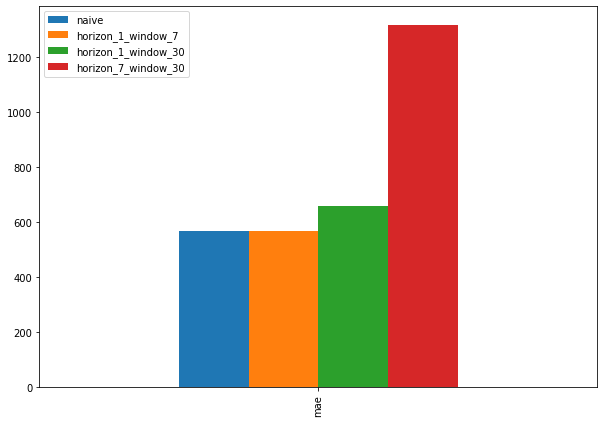

In [70]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D

Onto the next modelling experiment!

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.



In [71]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [72]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [73]:
# Create train/test splits
window_trains, window_tests, label_trains, label_tests = make_train_test_split(full_windows, full_labels)
len(window_trains), len(window_tests), len(label_trains), len(label_tests)

(2224, 556, 2224, 556)

In [74]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(window_trains,
            label_trains,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(window_tests, label_tests),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets wr

In [75]:
# Make predictions
model_4_preds = make_preds(model_4, window_tests)

In [76]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(label_tests),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 624.1892,
 'mse': 1271775.2,
 'rmse': 1127.7301,
 'mape': 2.83045,
 'mase': 1.0965276}

In [77]:
window_trains.shape

(2224, 7)

In [78]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(window_trains,
            label_trains,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(window_tests, label_tests),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


In [94]:
model_5_preds = make_preds(model_5, window_tests)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9001.638, 8836.167, 9026.134, 8862.39 , 8757.421, 8802.347,
       8757.111, 8565.564, 8528.356, 8556.624], dtype=float32)>

In [95]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(label_tests),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 597.89825,
 'mse': 1276845.8,
 'rmse': 1129.976,
 'mape': 2.6928196,
 'mase': 1.0503416}

In [79]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [80]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [81]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


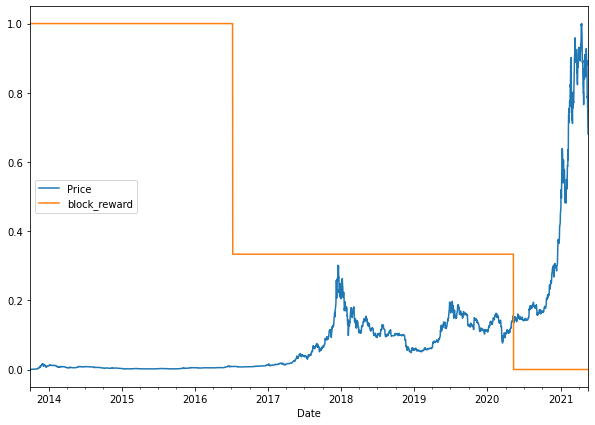

In [82]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [83]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [84]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [85]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [86]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [87]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


In [88]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.4503


568.4503173828125

In [89]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8854.9375, 8783.561 , 9061.753 , 8759.416 , 8737.171 , 8784.179 ,
       8680.541 , 8514.698 , 8481.642 , 8540.749 ], dtype=float32)>

In [90]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 568.4503,
 'mse': 1166160.1,
 'rmse': 1079.8889,
 'mape': 2.5497797,
 'mase': 0.9986098}

In [91]:
model_1_results

{'mae': 568.5499,
 'mse': 1172587.9,
 'rmse': 1082.861,
 'mape': 2.5492291,
 'mase': 0.9987845467588513}

In [92]:
naive_results

{'mae': 567.9802273457542,
 'mse': 1147547.125023896,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182626}

In [96]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980227,1.147547e+06,1071.236260,2.516525,0.999570
model_1_dense_w7_h1,568.549927,1.172588e+06,1082.860962,2.549229,0.998785
model_2_dense_w30_h1,658.029114,1.417082e+06,1190.412476,3.039736,1.150241
model_3_dense_w30_h7,1317.801880,5.712460e+06,1499.331421,5.803435,2.344954
model_4_CONV1D,624.189209,1.271775e+06,1127.730103,2.830450,1.096528
model_5_LSTM,597.898254,1.276846e+06,1129.975952,2.692820,1.050342
model_6_multivariate,568.450317,1.166160e+06,1079.888916,2.549780,0.998610


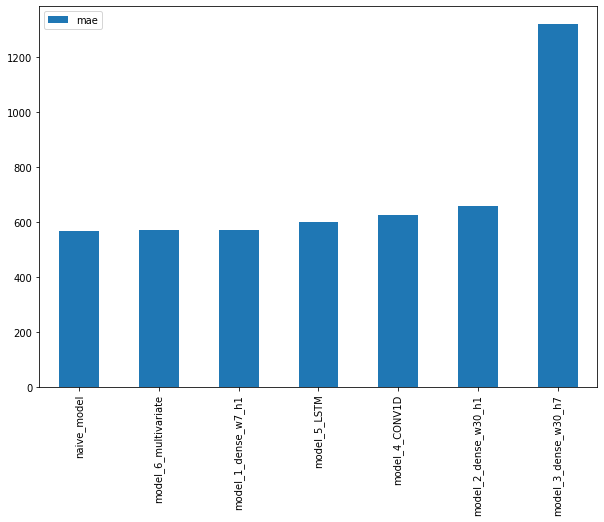

In [97]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");